In [1]:
from tensorflow import keras

In [2]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

In [3]:
train_images, test_images = train_images / 255, test_images / 255

In [4]:
from keras import layers, models, losses

In [5]:
model = models.Sequential()

In [6]:
train_images.shape[0] + test_images.shape[0]

60000

In [7]:
#Feature Learning
model.add(layers.Conv2D(32, (3, 3), activation="relu", input_shape=(32,32,3))) #input 
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(64, (3,3), activation="relu"))
model.add(layers.MaxPooling2D())
model.add(layers.Conv2D(64, (3,3), activation = "relu"))
model.add(layers.MaxPooling2D())

In [8]:
#Classification
model.add(layers.Flatten())
model.add(layers.Dense(64, activation = "relu"))
model.add(layers.Dense(10))

In [9]:
model.compile(optimizer="adam", 
              loss = losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
from keras.preprocessing.image import ImageDataGenerator

In [11]:
data_generator = ImageDataGenerator(
    rotation_range=40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

In [12]:
data_generator.fit(train_images)

In [13]:
train_labels.shape

(50000, 1)

In [14]:
train_images.shape

(50000, 32, 32, 3)

In [37]:
model.fit(data_generator.flow(train_images, train_labels), batch_size = 2048,
                              epochs = 25, verbose = 1)

Epoch 1/25
1563/1563 [==============================] - 46s 30ms/step - loss: 1.6765 - accuracy: 0.1000
Epoch 2/25
1563/1563 [==============================] - 45s 29ms/step - loss: 1.5521 - accuracy: 0.0966
Epoch 3/25
1563/1563 [==============================] - 45s 29ms/step - loss: 1.4694 - accuracy: 0.0974
Epoch 4/25
1563/1563 [==============================] - 44s 28ms/step - loss: 1.4113 - accuracy: 0.0966
Epoch 5/25
1563/1563 [==============================] - 45s 29ms/step - loss: 1.3706 - accuracy: 0.0963
Epoch 6/25
1563/1563 [==============================] - 44s 28ms/step - loss: 1.3428 - accuracy: 0.0970
Epoch 7/25
1563/1563 [==============================] - 45s 28ms/step - loss: 1.3069 - accuracy: 0.0983
Epoch 8/25
1563/1563 [==============================] - 44s 28ms/step - loss: 1.2780 - accuracy: 0.0993
Epoch 9/25
1563/1563 [==============================] - 44s 28ms/step - loss: 1.2584 - accuracy: 0.0986
Epoch 10/25
1563/1563 [==============================] - 43s 28m

In [38]:
loss = model.evaluate(data_generator.flow(test_images, test_labels), batch_size=2048)

313/313 [==============================] - 16s 50ms/step - loss: 1.1075 - accuracy: 0.1234


In [39]:
class_name= ["airplane", "automobile","bird","cat","deer","dog","frog","horse", "ship","truck"]

In [40]:
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing import image

In [90]:
img = image.load_img("cat.jpeg", target_size=(32,32,3))

In [91]:
#img = image.load_img("/content/download.jpeg", target_size=(32,32,3))

In [92]:
img_array = image.img_to_array(img)
img_array = img_array / 255
reshaped_img_array = img_array.reshape((1,)+img_array.shape)

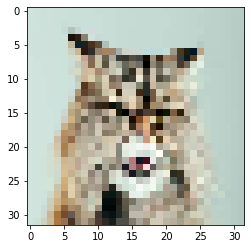

In [93]:
plt.figure()
plt.imshow(img_array)

In [94]:
prediction = model.predict(reshaped_img_array)

In [95]:
predicted_value = class_name[np.argmax(prediction)]

In [96]:
predicted_value

'cat'

In [97]:
#load and save model
model.save('cnn_model.h5')

In [99]:
import tensorflow as tf

In [100]:
model2 = tf.keras.models.load_model("cnn_model.h5")

In [101]:
prediction2 = model2.predict(reshaped_img_array)

In [102]:
predicted_value = class_name[np.argmax(prediction2)]

In [103]:
predicted_value

'cat'